# Lowess Implementation
-   It is a Non parametric Algorithm , which means , it will not learn a theta, that will represent entire function , instead it will generate theta for every query point.

# Steps Of Implementations
-   Read and Normalise the datasheet
-   Generate W
-   No Training is involved, directly make predictions using closed form solutions we derived.
-   (X.TWX)inv *(X.TWY) where X.T is X_Transpose
-   Find the best value of Tau(BandWidth Parameter)[Cross Validations]

# Load Datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
dfx=pd.read_csv('weightedX.csv')
dfy=pd.read_csv('weightedY.csv')
print(dfx.shape,dfy.shape)

(99, 1) (99, 1)


# Normalise the data

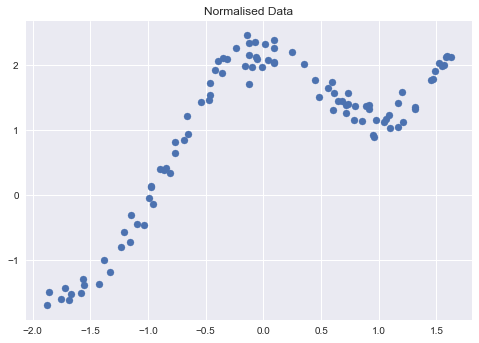

In [6]:
plt.style.use('seaborn')
X=dfx
Y=dfy
u=X.mean()
std=X.std()
X=(X-u)/std
plt.title('Normalised Data')
plt.scatter(X,Y)
plt.show()

- we will compute theta for every x test
- there is no generic theta, thats why it is a non parametric algorithm
- It has not a fixed curve, You can still make the predictions for the given query point by using weighted loss, so what does this weighted loss do? It gives more weight to the points in the nearby region, 
- This tau parameter controls how quickly the weight will fall as we move away from query point 

# Find W(MXM) Diagonal Matrix 

# Difference between numpy array and Numpy Matrix
-  if a and b are matrix , so on doing a*b, we will get matrix multiplication
-  if a and b are arrays , so on doing a*b , we will get element wise product

In [33]:
def getTheta(tau,X,query_point):
    m=X.shape[0]
    W=np.mat(np.eye(m))
    for i in range(m):
        W[i,i]=np.exp(np.dot((X[i]-query_point),(X[i]-query_point).T)/(-2*tau*tau))
    return W

In [34]:
X=np.mat(X)
Y=np.mat(Y)
m=X.shape[0]

In [37]:
W=getTheta(10,X,-1)
print(W)

[[0.9979236  0.         0.         ... 0.         0.         0.        ]
 [0.         0.99982634 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99790723 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99489487 0.         0.        ]
 [0.         0.         0.         ... 0.         0.98725111 0.        ]
 [0.         0.         0.         ... 0.         0.         0.97578036]]


In [38]:
print(W.shape)

(99, 99)


In [40]:
W=getTheta(100,X,-1)
print(W)

[[0.99997921 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999826 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997905 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994882 0.         0.        ]
 [0.         0.         0.         ... 0.         0.9998717  0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975485]]


if we increase the value of tau, it becomes like an identity matrix

if w will become equal to 1, the formula of closed form solution for locally weighted regression become equal to linear regression, and the meaning of tau being large  is that in that bandwidth, whatever points are there in the bandwidth, all we have larger weight in computing theta

since tau is large , tau*tau will become extra large so denominator becomes infinity and e^-infinity
 will be so e^1/inf => e^0=>1 and that is why every weight is close to 1, so as we increase tau, it will become more like a linear regression problem.and in that case we will get a straight line and not a curve,

So tau should have small value, to get good results, we will try with different value and we will see what value of tau gives best results, small bandwidth basically means small region, in the neighbouring area of that point , in the vicinity of that point, is goint to have the more impact on loss.

So these Coefficients of diagonal matrix basically controls how much weight should be added at these points .

In [41]:
W=getTheta(0.5,X,-1)
print(W)

[[4.35429051e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.32889617e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.32581012e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29085285e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.90271836e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.50591432e-05]]


# Make Predictions

In [59]:
def predict(X,Y,query_x,tau):
    m=X.shape[0]
    ones=np.ones((m,1))
    X=np.hstack((X,ones))
    qx=np.mat([query_x,1])
    W=getTheta(tau,X,qx)
    # theta=(X.TWX)inv *(X.TWY)
    theta=np.linalg.pinv(X.T*W*X)*(X.T*W*Y)
    pred=np.dot(qx,theta)
    return (theta,pred)
    

In [62]:
theta,pred=predict(X,Y,1.0,1.0)
print(theta.shape)
print(pred)

(2, 1)
[[1.59564702]]


# Visualise Predictions and analyse the effect of Tau

In [81]:
def plotPrediction(tau):
    X_test=np.linspace(-2,2,20)
    Y_test=[]
    for xq in X_test:
        theta,pred=predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
    X0=np.array(X)
    Y0=np.array(Y)
    plt.title('tau/Bandwidth param %.2f'%tau)
    plt.scatter(X0,Y0)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

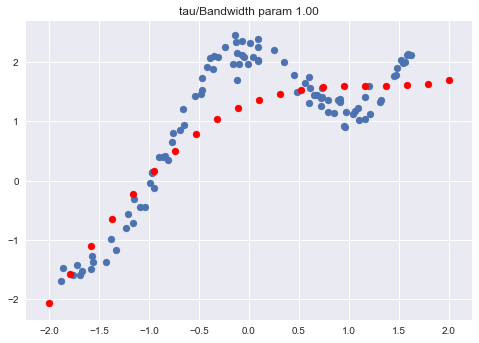

In [82]:
plotPrediction(1)

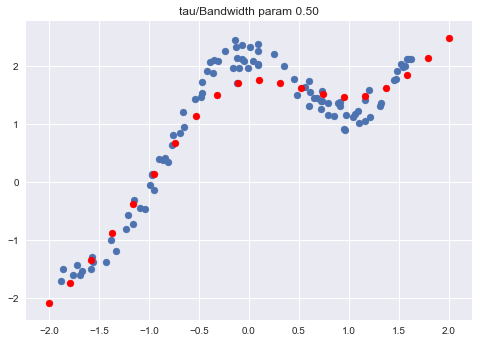

In [83]:
plotPrediction(0.5) # with lesser tau, it is giving better results

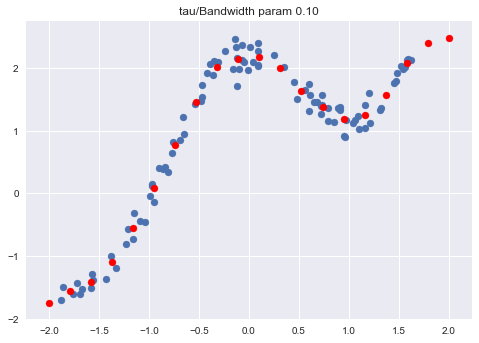

In [84]:
plotPrediction(0.1)

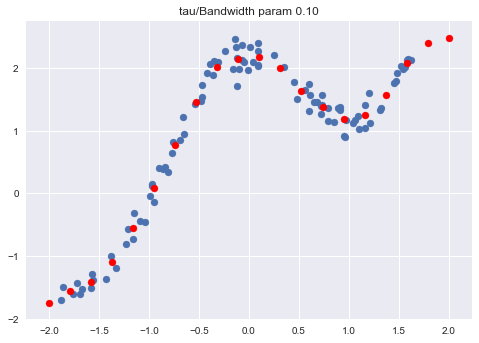

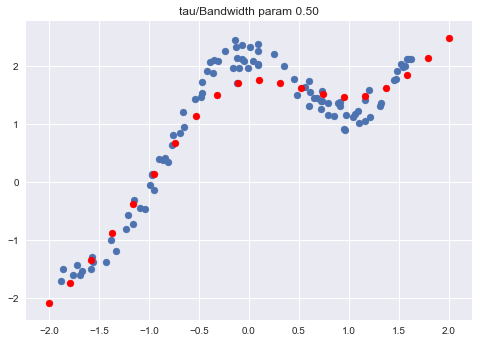

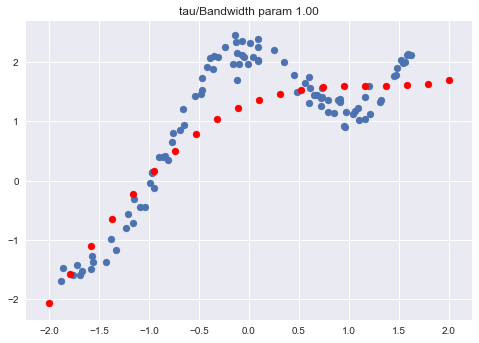

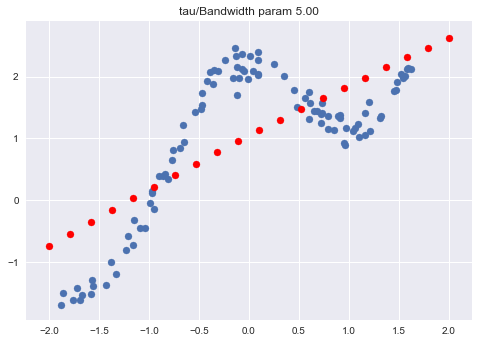

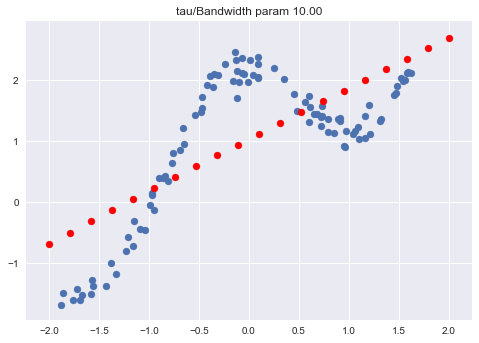

In [85]:
tau=[0.1,0.5,1,5,10]
for t in tau:
    plotPrediction(t)

So You can see, as the tau is increasing, the algorithm is moving towards linear regression. because You are giving more bandwidth, thus more number of points, for finding out the theta